In [33]:
#visualização de RMSE no jupyter
library(ggplot2)
mal=as.data.frame(read.table("ESC/100-4200/grouped_mal.txt"))
kal=as.data.frame(read.table("ESC/100-4200/grouped_kal.txt"))
ssa=as.data.frame(read.table("ESC/100-4200/grouped_ssa.txt"))
sti=as.data.frame(read.table("ESC/100-4200/grouped_sti.txt"))
spl=as.data.frame(read.table("ESC/100-4200/grouped_spl.txt"))

names(mal)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(kal)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(ssa)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(sti)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(spl)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")

#Tirando a média 
tamanhoGap= seq(100,4200,100) 
mediaSsa=c()
mediaSpl=c()
mediaKal=c()
mediaMal=c()
mediaSti=c()
sdSsa=c()
sdSpl=c()
sdKal=c()
sdMal=c()
sdSti=c()

for (i in seq(1,42,1)) {
    #calculando a média
	mediaSsa=append(mediaSsa,(mean(ssa$RMSE[seq(i,1260, 42)])))
	mediaSpl=append(mediaSpl,(mean(spl$RMSE[seq(i,1260, 42)])))
	mediaKal=append(mediaKal,(mean(kal$RMSE[seq(i,1260, 42)])))
	mediaMal=append(mediaMal,(mean(mal$RMSE[seq(i,1260, 42)])))
	mediaSti=append(mediaSti,(mean(sti$RMSE[seq(i,1260, 42)])))

    #Calculando o desvio padrão
    sdSsa=append(sdSsa,(sd(ssa$RMSE[seq(i,1260, 42)])))
	sdSpl=append(sdSpl,(sd(spl$RMSE[seq(i,1260, 42)])))
	sdKal=append(sdKal,(sd(kal$RMSE[seq(i,1260, 42)])))
	sdMal=append(sdMal,(sd(mal$RMSE[seq(i,1260, 42)])))
	sdSti=append(sdSti,(sd(sti$RMSE[seq(i,1260, 42)])))
}

mediaKal=as.data.frame(mediaKal)
names(mediaKal)=c("media")
mediaKal$sd=sdKal
mediaKal$tamanho=tamanhoGap
mediaKal$algoritmo="Kalman"

mediaMal=as.data.frame(mediaMal)
names(mediaMal)=c("media")
mediaMal$sd=sdMal
mediaMal$tamanho=tamanhoGap
mediaMal$algoritmo="Moving Average"


mediaSti=as.data.frame(mediaSti)
names(mediaSti)=c("media")
mediaSti$sd=sdSti
mediaSti$tamanho=tamanhoGap
mediaSti$algoritmo="Stine"

mediaSpl=as.data.frame(mediaSpl)
names(mediaSpl)=c("media")
mediaSpl$sd=sdSpl
mediaSpl$tamanho=tamanhoGap
mediaSpl$algoritmo="Spline"

mediaSsa=as.data.frame(mediaSsa)
names(mediaSsa)=c("media")
mediaSsa$sd=sdSsa
mediaSsa$tamanho=tamanhoGap
mediaSsa$algoritmo="SSA"
todos=rbind(mediaKal,mediaMal, mediaMal, mediaSti, mediaSpl, mediaSsa)


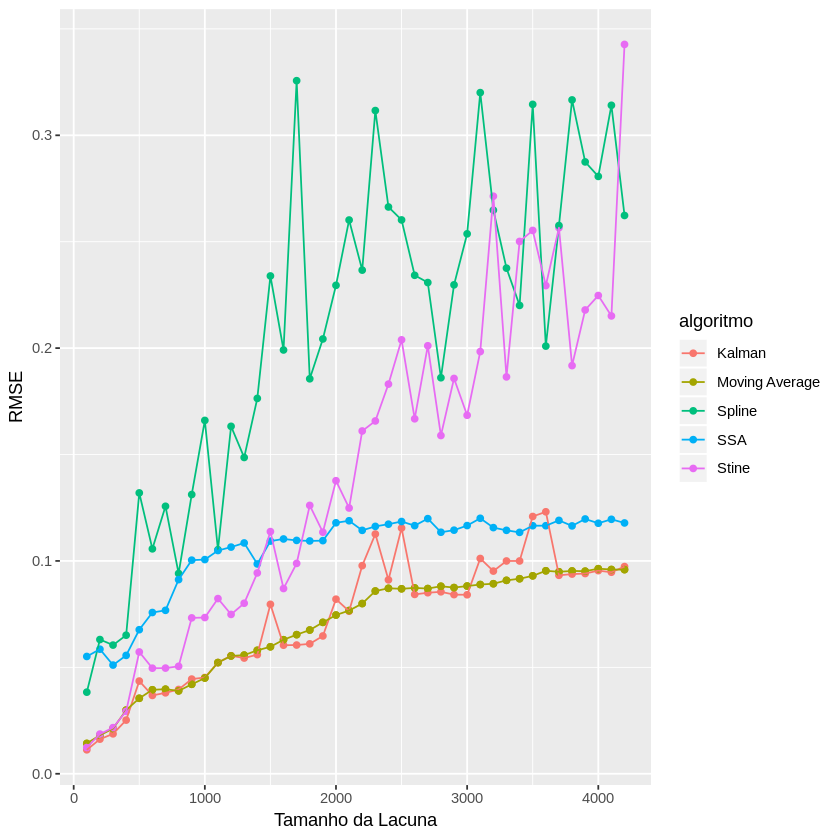

In [14]:
n=30 #tamanho da amostra. Ou seja, tem 30 lacunas de tamanho 100, 30 de tamanho 200... 30 de tamanho 4200
error=qnorm(0.975)*todos$sd/sqrt(n)
todos$error=error

# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right

ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    #geom_errorbar(aes(ymin=media-error, ymax=media+error), width=.1, position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")


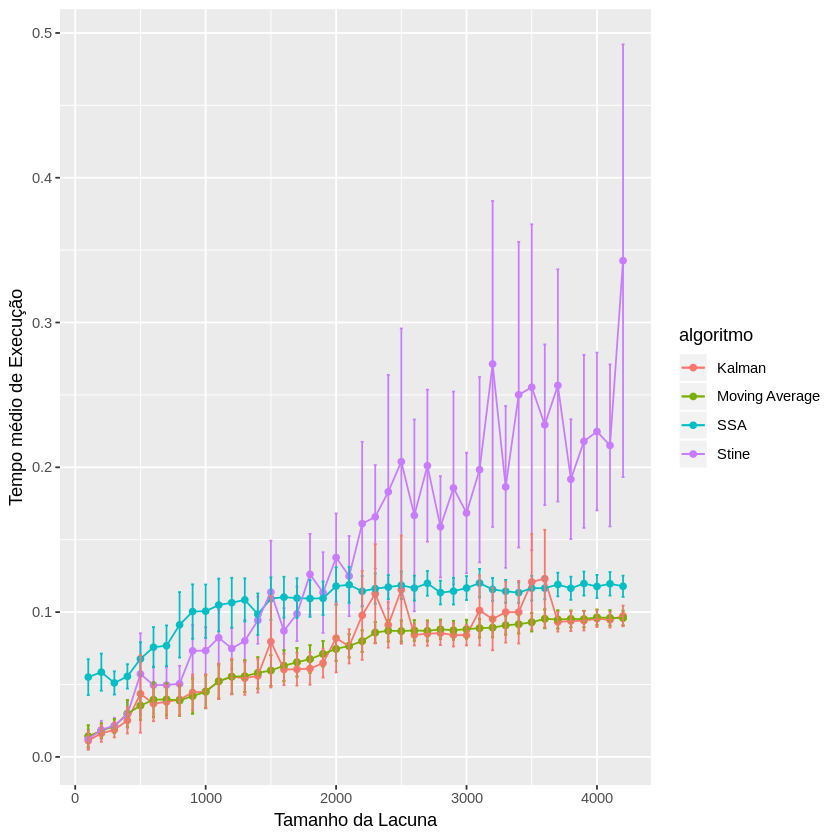

In [15]:

ggplot(todos[which(todos$algoritmo=="Kalman" | todos$algoritmo=="Stine" | todos$algoritmo=="Moving Average" | todos$algoritmo=="SSA"),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna")
    


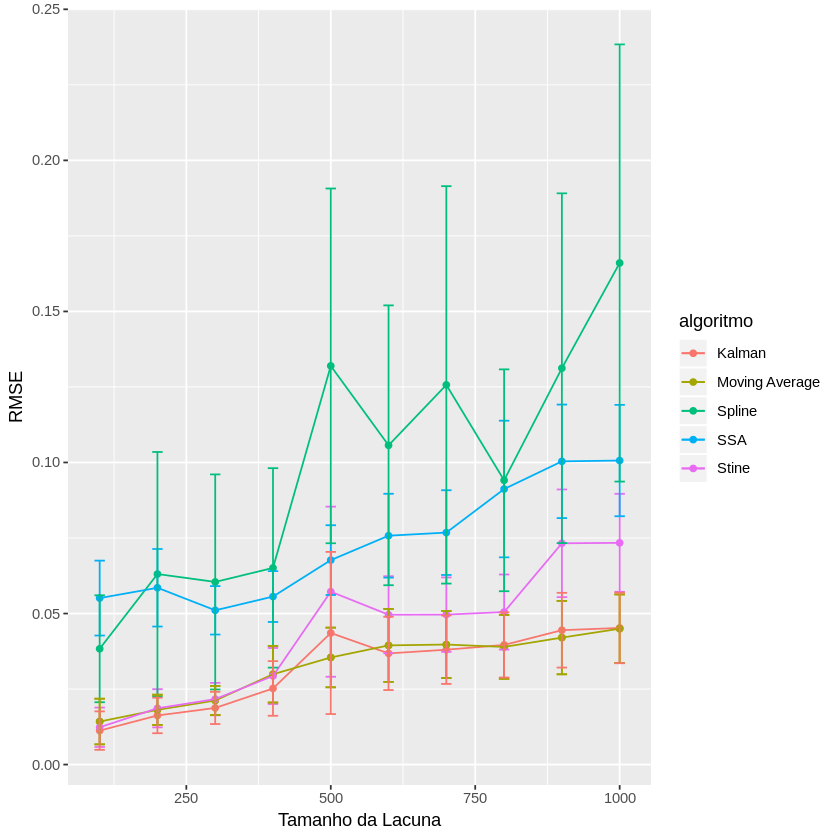

In [18]:

ggplot(todos[which( todos$tamanho<=2000 & (todos$algoritmo=="Kalman" | todos$algoritmo=="Stine" | todos$algoritmo=="Moving Average" | todos$algoritmo=="SSA")),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")
    


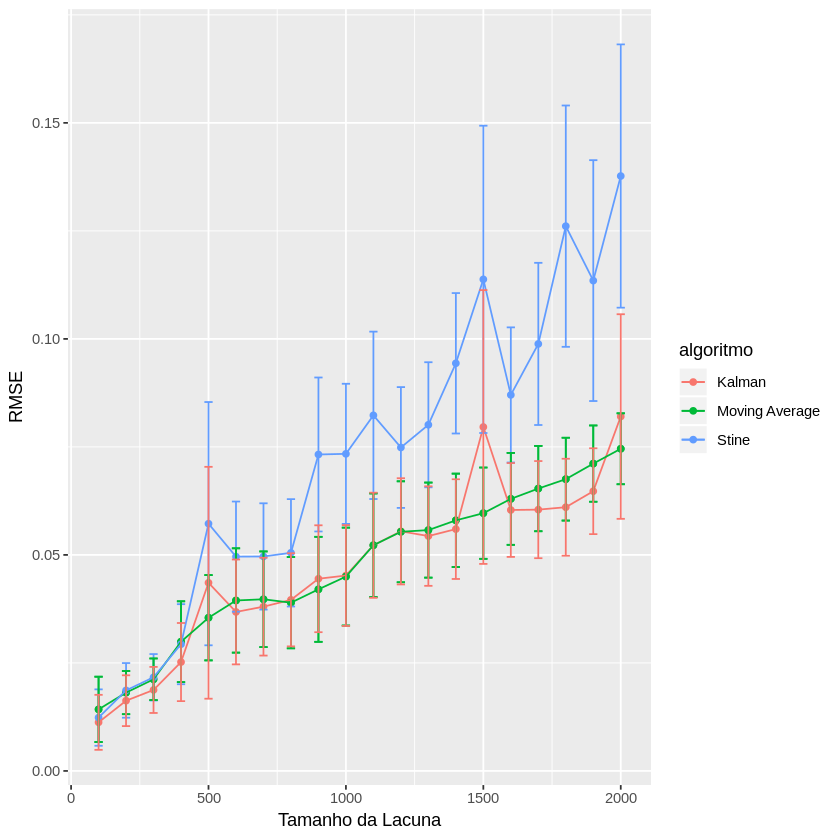

In [12]:

ggplot(todos[which( todos$tamanho<=2000 & (todos$algoritmo=="Kalman" | todos$algoritmo=="Stine" | todos$algoritmo=="Moving Average")),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")
    


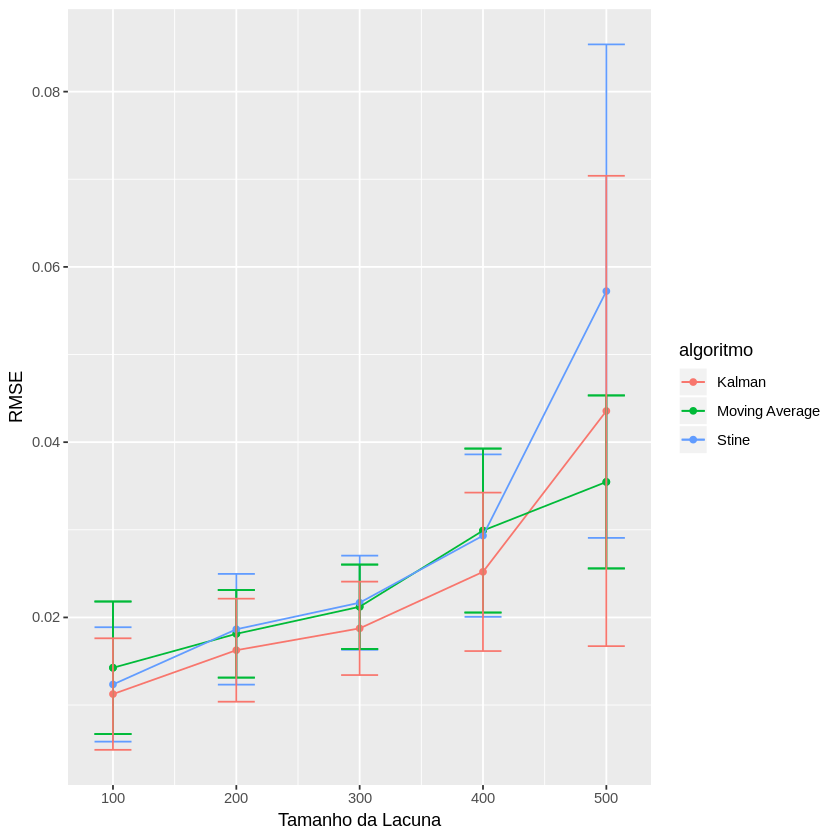

In [16]:
ggplot(todos[which( todos$tamanho<=500 & (todos$algoritmo=="Kalman" | todos$algoritmo=="Stine" | todos$algoritmo=="Moving Average")),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")
    


In [38]:
    todos[which(todos$algoritmo=="Kalman"),]

media,sd,tamanho,algoritmo
0.01125227,0.01777725,100,Kalman
0.01626008,0.01642990,200,Kalman
0.01875100,0.01489826,300,Kalman
0.02520021,0.02526791,400,Kalman
0.04355796,0.07499345,500,Kalman
0.03680266,0.03390458,600,Kalman
0.03802495,0.03164102,700,Kalman
0.03960874,0.03012388,800,Kalman
0.04448692,0.03457291,900,Kalman
0.04522598,0.03261841,1000,Kalman


In [37]:
seq(150,2100,50)

[1]  150  200  250  300  350  400  450  500  550  600  650  700  750  800  850
[16]  900  950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600
[31] 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100